<a href="https://colab.research.google.com/github/MelisaManiosCuellar/Big-Data/blob/master/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Se importan las librerías que se utilizarán en el proceso

In [1]:
pip install folium

In [2]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sb
import sklearn.metrics       as Metrics

import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
import folium  #needed for interactive map
from folium.plugins import HeatMap



from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score



In [4]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [5]:
%cd '/content/gdrive/MyDrive/Proyecto Python'

/content/gdrive/MyDrive/Proyecto Python


# Se lee el archivo: rayos_por_circuito.csv y se carga en un DataFrame. El archivo se encuentra dentro de la carpeta data.

In [6]:
pdf = pd.read_csv('rayos.csv', delimiter=',')
pdf.head(5)

anyo  mes  dia  ... codigo_municipio   longitud   latitud
0  2019    9    2  ...            66572 -76.146198  5.342645
1  2019   10   27  ...            17614 -75.704269  5.414855
2  2019   11   14  ...            17272 -75.566332  5.296955
3  2019    3    7  ...            17444 -75.057815  5.302833
4  2020    4    5  ...            17174 -75.729574  5.043280

[5 rows x 13 columns]

In [7]:
pdf.shape

(123885, 13)

In [8]:
print ("Shape antes de cleaning: ", pdf.shape)
pdf[[  'total_rayos','longitud', 'latitud']] = pdf[[ 'total_rayos','longitud', 'latitud']].apply(pd.to_numeric, errors='coerce')
       
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape despues de cleaning: ", pdf.shape)
pdf.head(5)

Shape antes de cleaning:  (123885, 13)
Shape despues de cleaning:  (121784, 13)


anyo  mes  dia  ... codigo_municipio   longitud   latitud
0  2019    9    2  ...            66572 -76.146198  5.342645
1  2019   10   27  ...            17614 -75.704269  5.414855
2  2019   11   14  ...            17272 -75.566332  5.296955
3  2019    3    7  ...            17444 -75.057815  5.302833
4  2020    4    5  ...            17174 -75.729574  5.043280

[5 rows x 13 columns]

In [9]:
pdf.columns

Index(['anyo', 'mes', 'dia', 'circuito', 'total_rayos', 'nombre_subestacion',
       'nombre_departamento', 'nombre_municipio', 'codigo_subestacion',
       'codigo_departamento', 'codigo_municipio', 'longitud', 'latitud'],
      dtype='object')

In [10]:
# Se muestran las estadísticas de las variables numéricas del DataFrame
pdf.describe()

anyo            mes  ...       longitud        latitud
count  121784.000000  121784.000000  ...  121784.000000  121784.000000
mean     2018.599726       6.696553  ...     -75.489290       5.199709
std         1.512009       3.112243  ...       0.358448       0.222812
min      2016.000000       1.000000  ...     -76.207660       4.558597
25%      2017.000000       4.000000  ...     -75.716510       5.022096
50%      2019.000000       7.000000  ...     -75.619128       5.214144
75%      2020.000000       9.000000  ...     -75.158950       5.390995
max      2021.000000      12.000000  ...     -74.677562       5.783817

[8 rows x 8 columns]

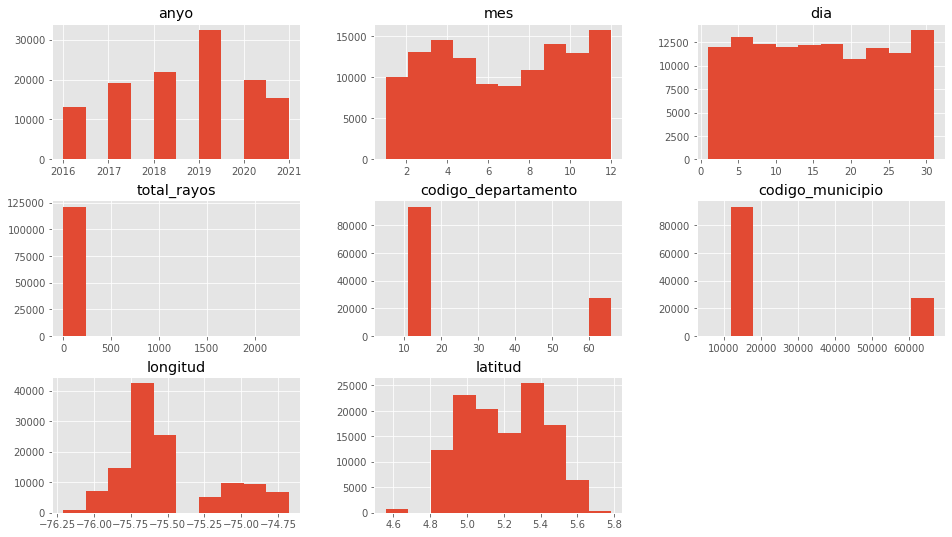

In [11]:
#Es estas gráficas vemos entre qué valores se concentran la mayoría de los registros (solo variables numéricas).
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
pdf.hist()
plt.show()


# **Definición de variables:**

En este paso se definen las variables continuas y categóricas para comparar las hipótesis de igual de medias.

**Prueba**


**Variable Continua:** Total de rayos (cantidad de veces que ocurrio el evento)

**Variable Categórica:** Departamento en el que ocurrió el evento, para la prueba se utilizarán los departamentos de Caldas y Risaralda.

**Hipótesis nula:** H0

**Hipótesis alternativa:** HA

**La hipótesis**  **H0** permite verificar si la media entre el departamento de Caldas y Risaralda son similares. Mientras que la hipótesis **HA** permite verificar si la media para los dos departamentos es diferente.

**Entonces:** 

**H0:** MediaCaldas = MediaRisaralda

**HA:** MediaCaldas != MediaRisaranda




**Justificación**

Esta prueba es importante porque permite comparar la media de los eventos ocurridos (total de rayos), para los departamentos seleccionados y verificar estadísticamente el comportamiento de los datos.

In [12]:
# Se filtran los datos para el departamento de Caldas
pdf_caldas = pdf['nombre_departamento']=='CALDAS'
filtro_pdf_caldas = pdf[pdf_caldas]
filtro_pdf_caldas


anyo  mes  dia  ... codigo_municipio   longitud   latitud
1       2019   10   27  ...            17614 -75.704269  5.414855
2       2019   11   14  ...            17272 -75.566332  5.296955
3       2019    3    7  ...            17444 -75.057815  5.302833
4       2020    4    5  ...            17174 -75.729574  5.043280
5       2019   11   19  ...            17001 -75.518424  5.066548
...      ...  ...  ...  ...              ...        ...       ...
121778  2018    7    9  ...            17665 -75.852206  5.067923
121779  2019    6   16  ...            17174 -75.619128  4.997038
121780  2019    9   24  ...            17013 -75.458458  5.610618
121781  2019    9   12  ...            17001 -75.518424  5.066548
121782  2017    8    8  ...            17174 -75.648531  5.001568

[93538 rows x 13 columns]

In [13]:
# Se muestran las estadísticas de los datos de Caldas
filtro_pdf_caldas.describe()

anyo           mes  ...      longitud       latitud
count  93538.000000  93538.000000  ...  93538.000000  93538.000000
mean    2018.584361      6.699267  ...    -75.398628      5.255531
std        1.516496      3.137502  ...      0.347982      0.192524
min     2016.000000      1.000000  ...    -75.852206      4.990918
25%     2017.000000      4.000000  ...    -75.649224      5.066548
50%     2019.000000      7.000000  ...    -75.503237      5.266020
75%     2020.000000      9.000000  ...    -75.057815      5.414855
max     2021.000000     12.000000  ...    -74.677562      5.610618

[8 rows x 8 columns]

In [14]:
pdf.loc[pdf.nombre_departamento == 'CALDAS'].groupby ('nombre_departamento').agg({'total_rayos':['max','min']})

total_rayos    
                            max min
nombre_departamento                
CALDAS                     2357   1

In [15]:
# Se filtran los datos para el departamento de Quindio
pdf_risaralda = pdf['nombre_departamento']=='RISARALDA'
filtro_pdf_risaralda = pdf[pdf_risaralda]
filtro_pdf_risaralda

anyo  mes  dia  ... codigo_municipio   longitud   latitud
0       2019    9    2  ...            66572 -76.146198  5.342645
7       2019    4   12  ...            66170 -75.663371  4.855818
23      2020   10    9  ...            66456 -75.887864  5.303307
24      2016    5   20  ...            66440 -75.736965  4.942178
29      2017    1   19  ...            66170 -75.695794  4.834984
...      ...  ...  ...  ...              ...        ...       ...
121756  2016    9   23  ...            66170 -75.695794  4.834984
121770  2020    6   24  ...            66456 -75.887864  5.303307
121774  2020    6   20  ...            66088 -75.868584  5.208286
121775  2021    5   28  ...            66682 -75.634449  4.877996
121783  2021    5   10  ...            66170 -75.695794  4.834984

[26773 rows x 13 columns]

In [16]:
# Se muestran las estadísticas de los datos de Risaralda 
filtro_pdf_risaralda.describe()

anyo           mes  ...      longitud       latitud
count  26773.000000  26773.000000  ...  26773.000000  26773.000000
mean    2018.642438      6.712434  ...    -75.799591      5.015217
std        1.501730      3.020196  ...      0.145505      0.187286
min     2016.000000      1.000000  ...    -76.146198      4.834984
25%     2017.000000      4.000000  ...    -75.965404      4.877996
50%     2019.000000      7.000000  ...    -75.738606      4.942178
75%     2020.000000      9.000000  ...    -75.681874      5.208286
max     2021.000000     12.000000  ...    -75.634449      5.419183

[8 rows x 8 columns]

In [17]:
pdf.loc[pdf.nombre_departamento == 'RISARALDA'].groupby ('nombre_departamento').agg({'total_rayos':['max','min','count']})

total_rayos           
                            max min  count
nombre_departamento                       
RISARALDA                   752   1  26773



# **Se realizan las gráficas para comparar los datos de Caldas y Risaralda** 

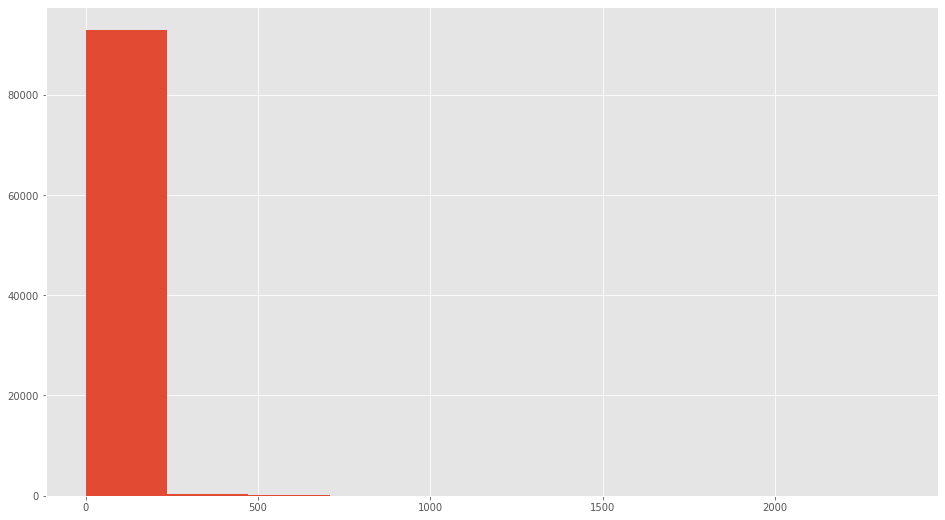

In [18]:
# Gráfica de histograma para Caldas
filtro_pdf_caldas['total_rayos'].hist()
plt.show()


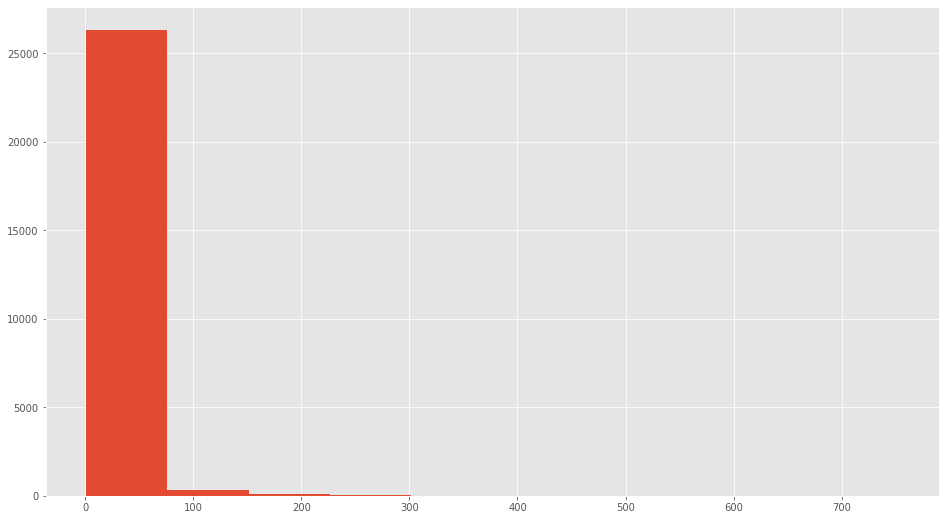

In [19]:
# Gráfica de histograma para Risaralda
filtro_pdf_risaralda['total_rayos'].hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


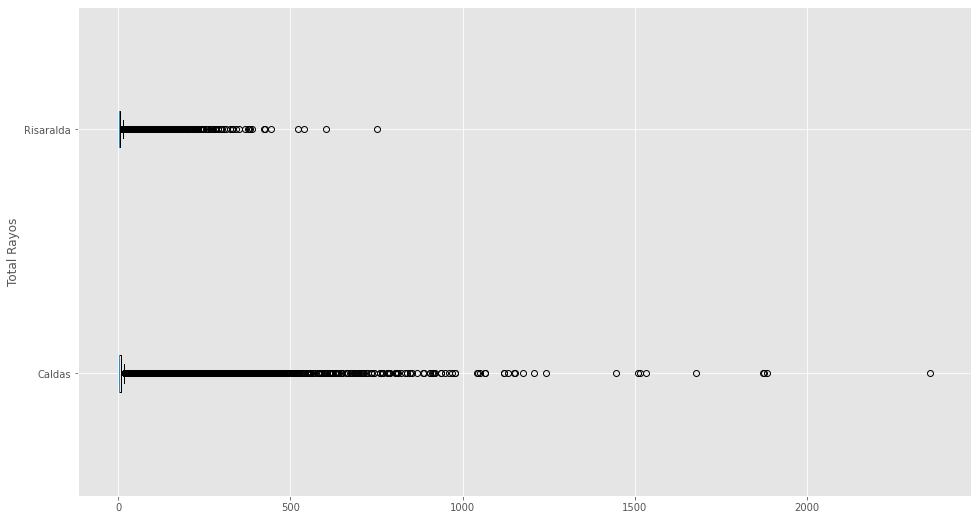

In [20]:
# Gráfica de Barras y Bigotes para Caldas y Risaralda
plt.boxplot((filtro_pdf_caldas['total_rayos'], filtro_pdf_risaralda['total_rayos']), 
            vert = False,
            labels = ["Caldas", "Risaralda"]
           )
plt.ylabel("Total Rayos")
plt.savefig("total-rayos.png",dpi=300)
plt.show()

En las gráficas de histograma se puede apreciar el rango de los valores para la columna total_rayos. Visualmente se observa que para Caldas la mayoría de los valores están entre 0 y 250, mientras que para la Risaralda los valores están entre 0 y 80. De esta forma se puede argumentar que para Caldas se presentó mayor cantidad de rayos en comparación con Risaralda.

En la gráfica de barras y bigotes se observa que la media para los dos departamentos es diferente, porque para Caldas es de 13.29, mientras que para Risaralda es de 8.19.




# **Se realizan los calculos estadísticos para validar la hipótesis**

In [21]:
# Se salcula la desviación estándar para Caldas (S1) y Risaralda (S2)
S1 = filtro_pdf_caldas['total_rayos'].std()
print("S1= ", S1)
S2 = filtro_pdf_risaralda['total_rayos'].std()
print("S2=", S2)

S1=  47.665903675176246
S2= 23.01552004836496


In [22]:
# Se calcula la diferencias de las medias (X-Y)
x_y = filtro_pdf_caldas['total_rayos'].mean() - filtro_pdf_risaralda['total_rayos'].mean()
print("X-Y= ", x_y)

X-Y=  4.9300179017320485


In [23]:
# Se calcula SD con base a S1, S2 y la cantidad de registros para cada muestra 
# Caldas = 93739
# Risaralda = 28111
SD = np.sqrt((pow(S1,2)/93739) + (pow(S2,2)/28111))
print("Desviación estándar= ", SD)

Desviación estándar=  0.20756103007748913


In [24]:
# Cómo no se tiene el valor de alfa, se utiliza el cálculo de t-student
T = x_y / SD
print("T-student= ", T)

T-student=  23.75213641930528


In [25]:
# Ahora se cálcula el T de las tablas para evaluar la hipótesis
# se define un alfa del 5%
alfa = 0.05
# n = (N1-1) + (N2-1)
n = (93739-1) + (28111-1)

t_tablas = stats.t.ppf(1-alfa, n)

print("T-Tablas= ", t_tablas)

T-Tablas=  1.6448661325387872



#**Resultados**

Como el valor de T-student es mayor a T-Tablas

 **23.75213641930528 > 1.6448661325387872**

Entonces:

Se rechaza H0 y se acepta la HA, porque la MediaCaldas es diferente (!=) a la MediaRisaranda


**Se realizan diagramas de dispersión entre pares de variables, para evaluar cuales candidatas pueden ser la mejores para el modelo.** 

<function matplotlib.pyplot.show>

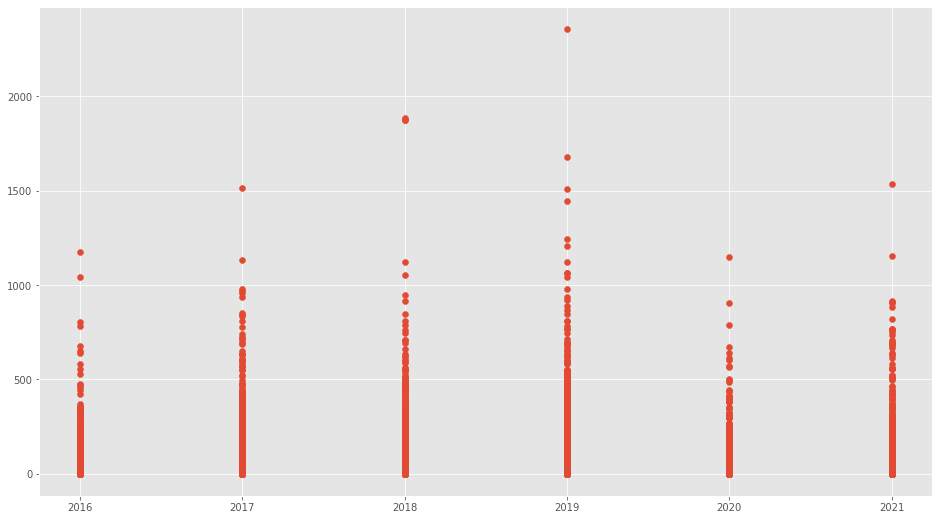

In [26]:
# Variable año y total de rayos
fig, ax = plt.subplots()
ax.scatter(pdf['anyo'], pdf['total_rayos'])
plt.show

<function matplotlib.pyplot.show>

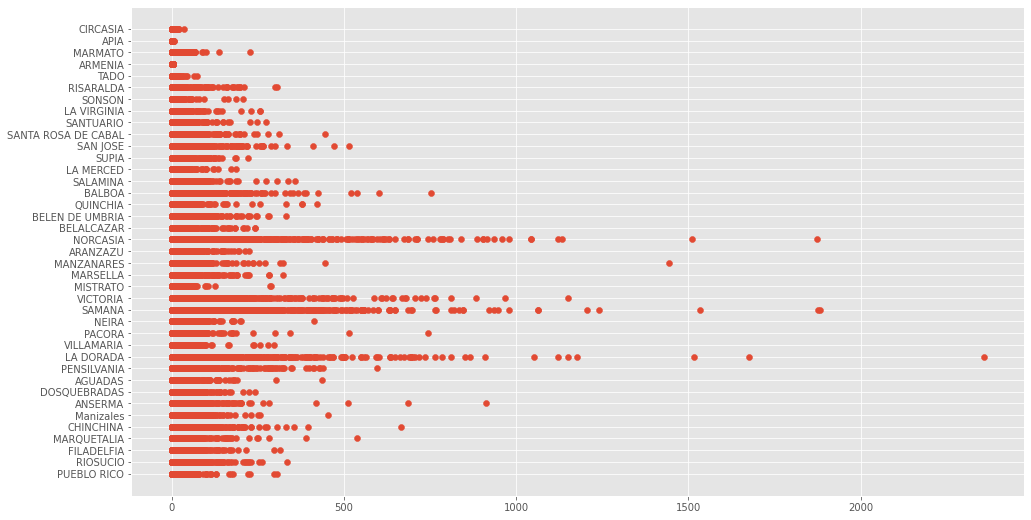

In [48]:
# Variable total rayos y Nombre_municipio
fig, ax = plt.subplots()
ax.scatter(pdf['total_rayos'], pdf['nombre_municipio'])
plt.show

<function matplotlib.pyplot.show>

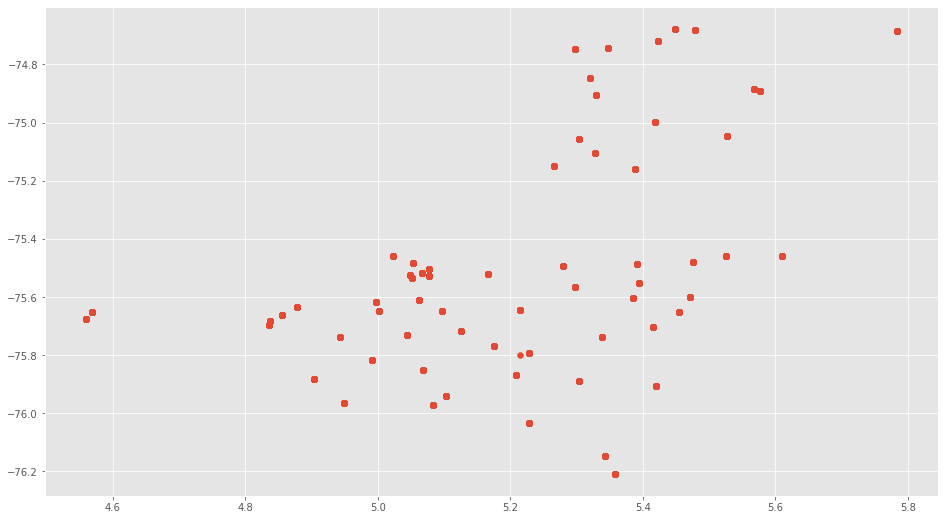

In [28]:
# Variable latitud y longitud en que ocurre el evento (rayo)
fig, ax = plt.subplots()
ax.scatter(pdf['latitud'], pdf['longitud'])
plt.show

 si hay presencia de NAN en la columna Latitud, Longitud, Total_rayos, de encontrar limpie la data omitiendo las filas con esta caracteristica, ya que dificultaran el analisis posterior

In [29]:
import folium
import re

m = folium.Map(location =[pdf.latitud.mean(), pdf.longitud.mean()], zoom_start=10, 
               tiles='Stamen Toner')
for i in range(0,1256):
    marker = folium.CircleMarker(location=[pdf["latitud"][i],pdf["longitud"][i]],radius=1,color="blue",fill=True)
    marker.add_to(m)

m




In [32]:
m = folium.Map(location=[pdf.latitud.mean(), pdf.longitud.mean()],
                        zoom_start=9,
                        tiles="OpenStreetMap")
#Nscatter plot de los primeros 2000 puntos
for i in range(0,1256):
    marker = folium.CircleMarker(location=[pdf["latitud"][i],pdf["longitud"][i]],radius=3,color="red",fill=True)
    marker.add_to(m)
m

In [34]:
m = folium.Map(location=[pdf.latitud.mean(), pdf.longitud.mean()],
                        zoom_start=9,
                        tiles="Stamen Terrain")
#Nscatter plot de los primeros 2000 puntos
for i in range(0,1256):
    marker = folium.CircleMarker(location=[pdf["latitud"][i],pdf["longitud"][i]],radius=3,color="red",fill=True)
    marker.add_to(m)
m

In [35]:
max_amount = float(pdf['total_rayos'].max())
max_amount

2357.0

In [39]:
max_amount = float(pdf['total_rayos'].max())

folium_hmap = folium.Map(location=[pdf.latitud.mean(), pdf.longitud.mean()],
                        zoom_start=11,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(pdf['latitud'], pdf['longitud'], pdf['total_rayos'])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=8, blur=6, 
                   max_zoom=10, 
                 )

folium_hmap.add_child(hm_wide)

In [41]:
datosx=pdf[['latitud','longitud','total_rayos']].agg (['max','min','count'])
datosx

latitud       longitud  total_rayos
max         5.783817     -74.677562         2357
min         4.558597     -76.207660            1
count  121784.000000  121784.000000       121784

In [42]:
pdf.groupby(['nombre_departamento'])['total_rayos'].describe()

count       mean        std  min  25%  50%  75%     max
nombre_departamento                                                           
ANTIOQUIA              295.0   9.901695  24.101130  1.0  1.0  2.0  7.0   207.0
CALDAS               93538.0  13.312194  47.665904  1.0  1.0  2.0  8.0  2357.0
CHOCO                  372.0   3.809140   7.429353  1.0  1.0  1.0  3.0    74.0
QUINDIO                806.0   1.806452   2.383120  1.0  1.0  1.0  2.0    36.0
RISARALDA            26773.0   8.382176  23.015520  1.0  1.0  2.0  6.0   752.0

In [43]:

pdf.groupby(by=['latitud', 'longitud','nombre_departamento']).mean()

anyo  ...  codigo_municipio
latitud  longitud   nombre_departamento               ...                  
4.558597 -75.674746 QUINDIO              2018.336066  ...           63190.0
4.568992 -75.651720 QUINDIO              2018.364780  ...           63001.0
4.834984 -75.695794 RISARALDA            2018.510638  ...           66170.0
4.837803 -75.681874 RISARALDA            2018.440773  ...           66170.0
4.855818 -75.663371 RISARALDA            2018.671508  ...           66170.0
...                                              ...  ...               ...
5.526655 -75.047311 CALDAS               2018.402009  ...           17662.0
5.568110 -74.883718 CALDAS               2018.399306  ...           17495.0
5.576998 -74.890417 CALDAS               2018.369994  ...           17495.0
5.610618 -75.458458 CALDAS               2018.701097  ...           17013.0
5.783817 -74.686641 ANTIOQUIA            2019.827119  ...            5756.0

[65 rows x 6 columns]

In [44]:
pdf.columns

Index(['anyo', 'mes', 'dia', 'circuito', 'total_rayos', 'nombre_subestacion',
       'nombre_departamento', 'nombre_municipio', 'codigo_subestacion',
       'codigo_departamento', 'codigo_municipio', 'longitud', 'latitud'],
      dtype='object')

In [45]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

Clus_dataSet = pdf[['longitud','latitud','total_rayos']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["nombre_municipio","total_rayos"]].head(80)

nombre_municipio  total_rayos
0       PUEBLO RICO            1
1          RIOSUCIO            1
2        FILADELFIA           38
3       MARQUETALIA            3
4         CHINCHINA           14
..              ...          ...
75        LA MERCED            5
76        LA DORADA            1
77        CHINCHINA            1
78        LA DORADA            1
79      PENSILVANIA            9

[80 rows x 2 columns]

In [46]:
len(labels)

121784

Se realiza la gráfica de dispersión separando los puntos por color con base a la media de la latitud

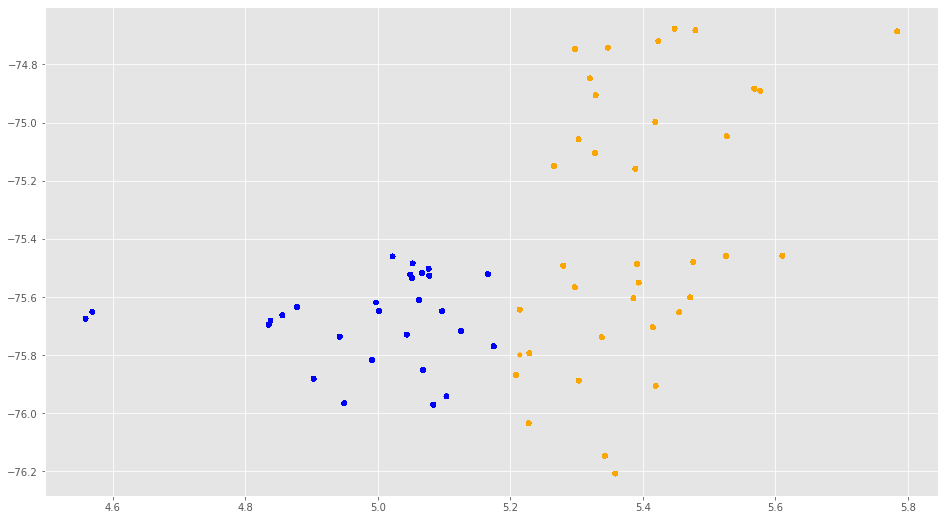

In [51]:
# Defino los colores para la gráfica
colores = ['orange', 'blue']
# Defino el tamaño de la gráfica
tamanio = [20,40]

# Traigo los valores de latitud
f1 = pdf['latitud'].values
# Traigo los valores de longitud
f2 = pdf['longitud'].values

# Se pintan los puntos con los colores definidos (por debajo y encina de la media de latitud)
asignar = []

for index, row in pdf.iterrows():
    if(row['latitud'] > 5.19):
        # Asigno el color naranja
        asignar.append(colores[0])
    else:
        # Asigno el color azul
        asignar.append(colores[1])

# Genero la gráfica
plt.scatter(f1, f2, c=asignar, s=tamanio[0])
plt.show()